In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import rubin_sim.maf as maf
import os
from rubin_sim.data import get_baseline

In [2]:
class GapsMetric(maf.BaseMetric):
    """Compute the number of the time gaps between observations that occur in a given time range.

    Parameters
    ----------
    times_col : `str`, opt
        The column name for the exposure times.  Values assumed to be in days.
        Default observationStartMJD.
    time_scale : `float` (2/24)
        Time scale to see how well it is sampled (days).
   

    Returns
    -------
    """

    def __init__(
        self,
        times_col="observationStartMJD",
        time_scale=2. / 24,
        units="N",
        **kwargs,
    ):
        self.times_col = times_col
        # divide by two so we bin at the Nyquist frequency
        self.bin_size=time_scale / 2.
        super().__init__(
            col=[self.times_col], metric_dtype="float", units=units, **kwargs
        )

    def run(self, data_slice, slice_point=None):
        if data_slice.size < 2:
            return self.badval
        times = np.sort(data_slice[self.times_col])
        bins = np.arange(times.min()-self.bin_size, times.max()+self.bin_size, self.bin_size)
        vals, _be = np.histogram(times, bins)
        mult = vals[2:] * vals[0:-2]
        result = np.size(np.where(mult > 0)[0])
        
        return result


In [3]:
baseline_file = get_baseline()
#baseline_file = '/users/yoachim/runs31/noroll/noroll_v3.1_10yrs.db'
run_name = os.path.basename(baseline_file).replace('.db', '')


In [4]:

bundle_list = []
for filtername in 'ugrizy':
    metric = GapsMetric(time_scale=2/24.)
    slicer = maf.HealpixSlicer()
    summary_sats = [maf.MedianMetric(), maf.SumMetric()]
    sql = "filter='%s' and note not like '%%neo%%'" % filtername

    bundle_list.append(maf.MetricBundle(metric, slicer, sql, summary_metrics=summary_sats))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [5]:
mbg = maf.MetricBundleGroup(bundle_list, baseline_file, out_dir='temp')
mbg.run_all()

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 1049 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 614 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 793 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:148: UserWarning: Optimal bin calculation tried to make 887 bins, returning 200
  warnings.warn(


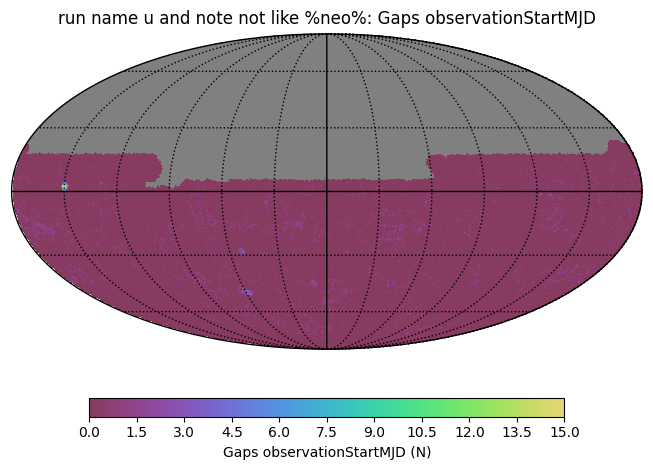

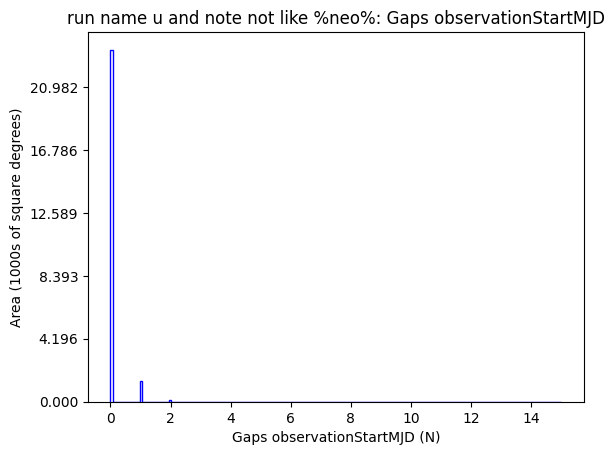

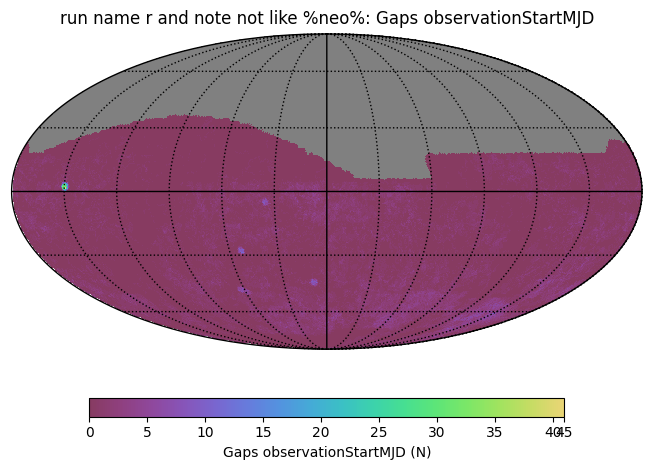

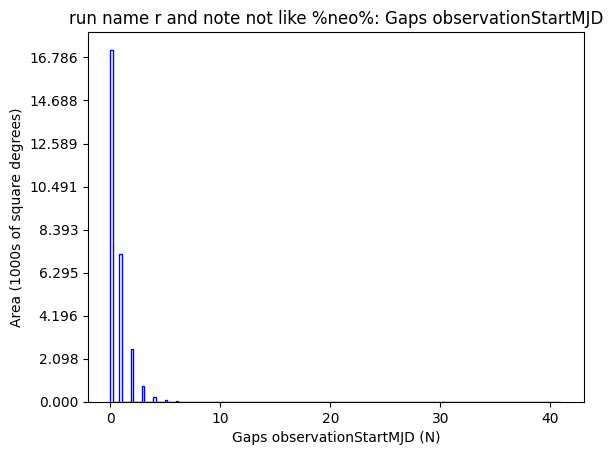

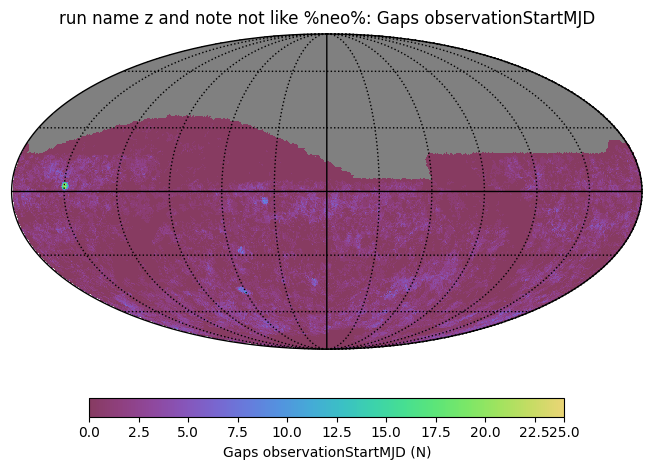

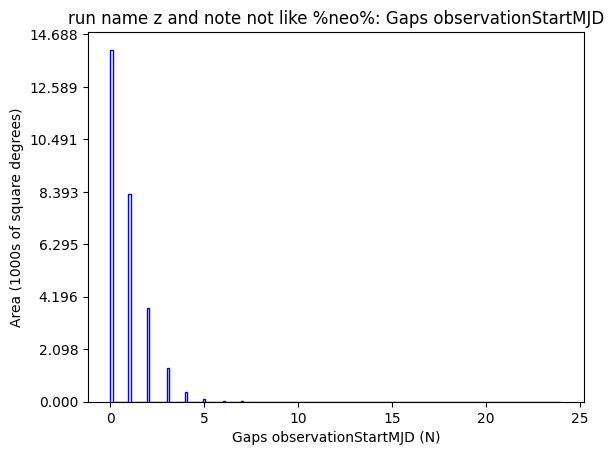

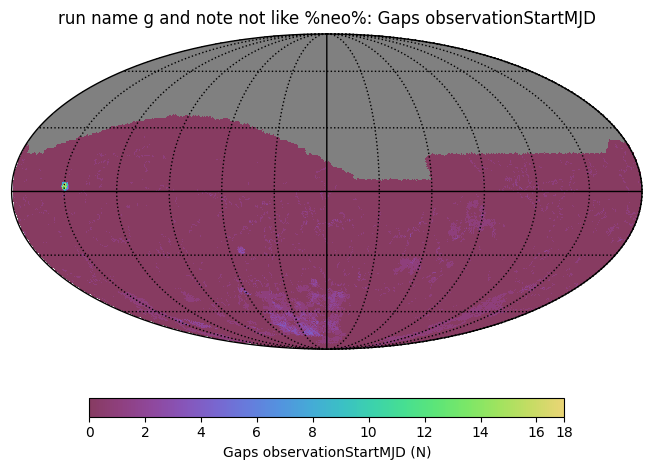

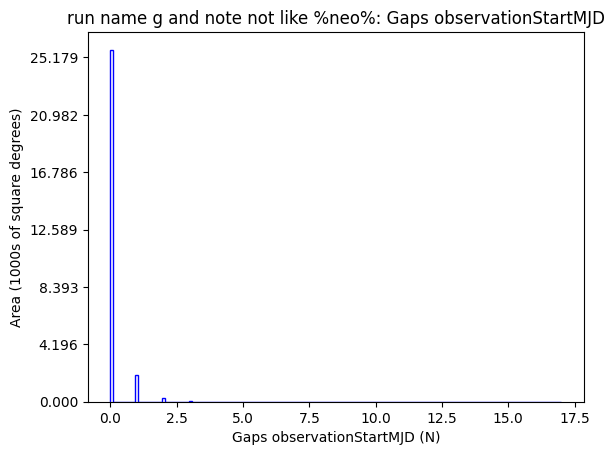

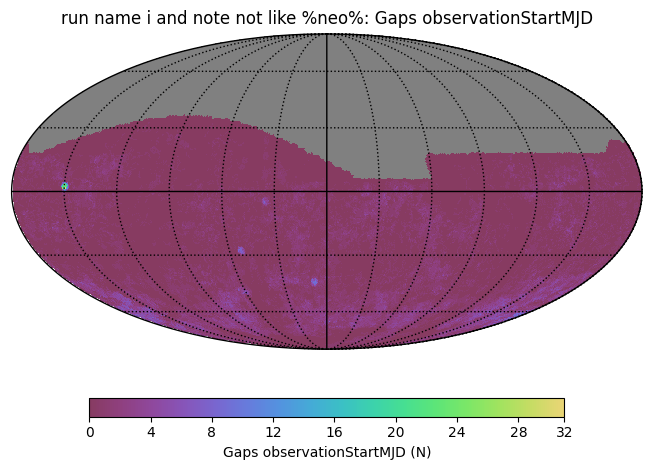

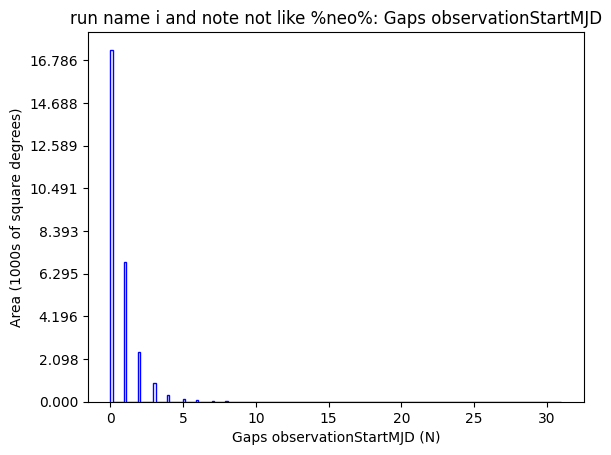

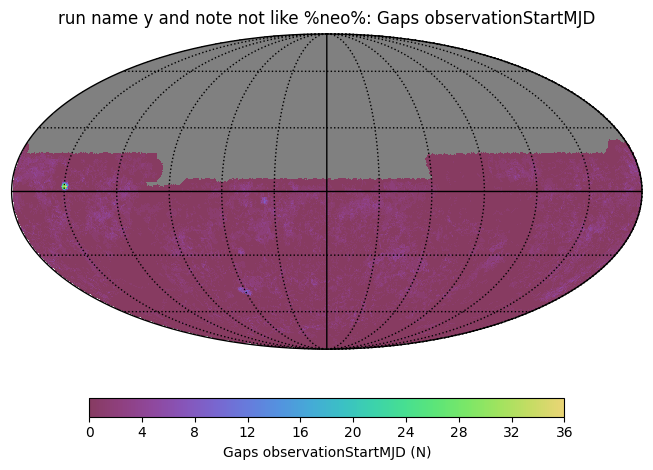

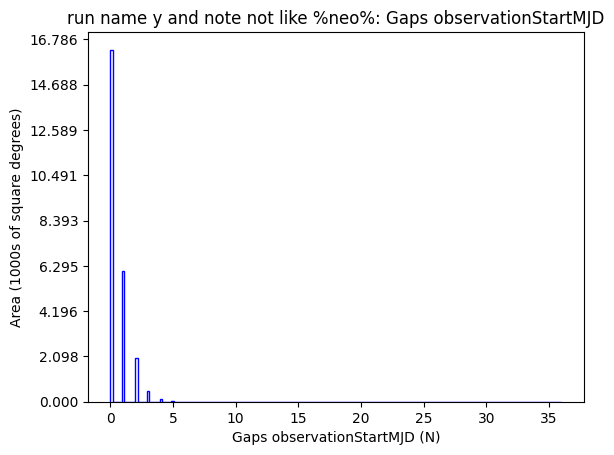

In [6]:
mbg.plot_all(closefigs=False)

In [7]:
for b in bundle_list:
    print(b.summary_values)

{'Median': 0.0, 'Sum': 8051.0}
{'Median': 0.0, 'Sum': 13250.0}
{'Median': 0.0, 'Sum': 79591.0}
{'Median': 0.0, 'Sum': 82965.0}
{'Median': 0.0, 'Sum': 107381.0}
{'Median': 0.0, 'Sum': 60208.0}
